# Fruit Type Prediction - A Simple Classification ML Example

## Importing Libraries

In [257]:
# import NumPy, Pandas, Matplotlib.pyplot libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Importing Dataset

In [258]:
my_fruits = pd.read_table("fruit_data_with_colors.txt")

In [259]:
# Print the head of data to see some of the data

my_fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [260]:
# Lets see how many items (fruits) and how many features we have 
my_fruits.shape

(59, 7)

In [261]:
# Lets dive deeper and take a look at the whole data
# my_fruits

## Splitting the dataset into *Training* and *Testing* sets

In [262]:
# importing the split function from SKLearn library
from sklearn.model_selection import train_test_split


In [263]:
# Introdcuing features as X variables 
# Capital X referring to an array 
X = my_fruits[['mass', 'width', 'height']]

# introducing fruit_label as the target variable y
# small y referring to a scalar and not an array
y = my_fruits['fruit_label']

In [264]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# random_state is a parameter used in how to randomly select the training and testing data sets

Lets take a look at the training and testing sets

In [265]:
# see the head of X_train
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [266]:
# see the head of X_test
X_test.head()

,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6


In [267]:
# see the head of y_train
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

In [268]:
# see the head of y_test
y_test.head()

26    3
35    3
43    4
28    3
11    1
Name: fruit_label, dtype: int64

## Visualization

### A 3D Feature Scatter Plot

<IPython.core.display.Javascript object>


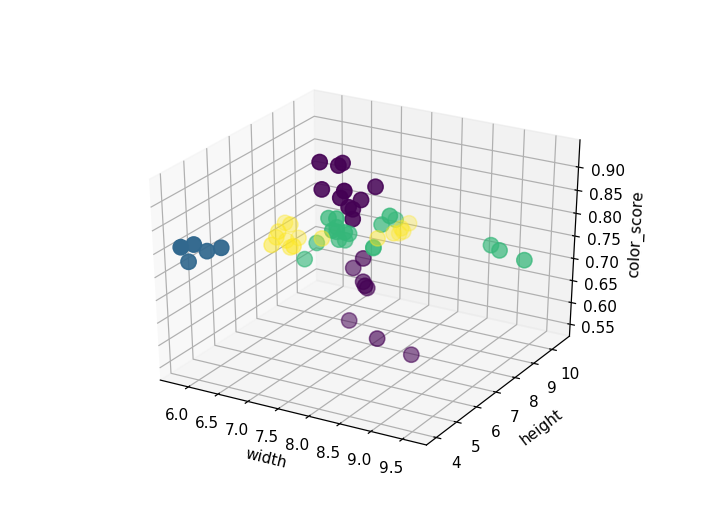

In [269]:

%matplotlib notebook 

# Capital X referring to an array 
X_plot = my_fruits[['mass', 'width', 'height', 'color_score']]

y_plot = my_fruits['fruit_label']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_plot['width'], X_plot['height'], X_plot['color_score'], c = y_plot, marker = 'o', s = 100)

ax.set_xlabel('width')

ax.set_ylabel('height')

ax.set_zlabel('color_score')

plt.show()


## Applying a ML Algorithm - KNN

### Creating a classifier object of the KNN algorithm

In [281]:
# importing the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier as KNN

number_of_neighbors = 5   # this is K in KNN

my_knn = KNN(number_of_neighbors)  #creating a KNN object


### Training The Classifier my_knn using the training data set

Here we want to **Teach** the algorithm --> or in another term **supervise** or **train** the aglorithm using our labeled 
training data set

In [282]:
# use the fit command to train the ML algorithm using the training data set
my_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Estimataing the Accuracy of the algorithm on future data 

Here we use the test data set, which is labeld, to **estimate** the **accuracy** of the algorithm on future predictions (classification)

The accuracy can be changed by **tuning** the algorithm --> Using different values of parameters e.g. **K** here

e.g. Use {1, 2, 5} for k and re-run the algorithm 

In [283]:
# Use the score command to find the accuracy
my_knn.score(X_test, y_test)

0.53333333333333333

## Make Predictions

Now, Use your **trained algorithm** to make **prediction** (**classify**) a **new unsean object**

In [284]:
# Lets use the following fruit with its features [weight, height, color_score]
# unknown fruit = [mass = 20, width = 4.3, height = 5.5]
unknown_fruit = [[20, 4.3, 5.5]]

fruit_prediction = my_knn.predict(unknown_fruit)

fruit_prediction


array([2], dtype=int64)

#### Output Interpretation assistance
To interpret the output which is fruit_lable to something we understand (the name of the fruit), lets use the following code

In [285]:
give_me_fruit_name = dict(zip(my_fruits.fruit_label.unique(), my_fruits.fruit_name.unique()))

give_me_fruit_name[fruit_prediction[0]]

'mandarin'

#### Lets try another example

unknown fruit = [mass = 100, width = 6.3, height = 8.5]

In [288]:
# Lets use the following fruit with its features [weight, height, color_score]
# unknown fruit = [mass = 100, width = 6.3, height = 8.5]
unknown_fruit = [[100, 6.3, 8.5]]

fruit_prediction = my_knn.predict(unknown_fruit)

fruit_prediction

array([4], dtype=int64)

In [289]:
give_me_fruit_name[fruit_prediction[0]]

'lemon'